# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [3]:
cities

['sentyabrskiy',
 'mgandu',
 'xining',
 'canutama',
 'hilo',
 'gulmarg',
 'yellowknife',
 'tuktoyaktuk',
 'dobsina',
 'mys shmidta',
 'atuona',
 'angoche',
 'chubbuck',
 'cherskiy',
 'thompson',
 'mar del plata',
 'santiago',
 'trairi',
 'codrington',
 'rungata',
 'ushuaia',
 'ous',
 'harper',
 'kisangani',
 'beyla',
 'vaini',
 'ngukurr',
 'asyut',
 'punta arenas',
 'iqaluit',
 'lavrentiya',
 'maceio',
 'jamestown',
 'rikitea',
 'barra do bugres',
 'kerteh',
 'cockburn town',
 'avarua',
 'east london',
 'linxia',
 'butaritari',
 'georgetown',
 'saskylakh',
 'ponta do sol',
 'tadine',
 'port elizabeth',
 'tasiilaq',
 'vostok',
 'lieksa',
 'mataura',
 'bambous virieux',
 'kuala lipis',
 'san jose',
 'busselton',
 'victoria',
 'vaitape',
 'klaipeda',
 'bredasdorp',
 'beringovskiy',
 'taolanaro',
 'norman wells',
 'vardo',
 'aklavik',
 'cape town',
 'bluff',
 'albany',
 'ust-ishim',
 'alofi',
 'natal',
 'rock springs',
 'yenotayevka',
 'kvarkeno',
 'nikolskoye',
 'zheleznodorozhnyy',
 'por

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print('Beginning Data Retrieval\n-----------------------------\n')

weather_list = []
rcd = 0
sets = 1
for city in cities:
    rcd += 1
    print(f'Processing Record {rcd} of Set {sets} | {city}')
    
    if rcd == 50:
        rcd = 0
        sets += 1
        
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    
    weather = requests.get(url).json()
    
    try:
        weather_list.append({
            'city': city,
            'lat': weather['coord']['lat'],
            'lng': weather['coord']['lon'],
            'temp': weather['main']['temp_max'],
            'humidity': weather['main']['humidity'],
            'wind':weather['wind']['speed'],
            'cloudiness':weather['clouds']['all'],
            'country':weather['sys']['country'],
            'date':weather['dt']
        })
        
    except:
        print('City not found. Skipping...')
        pass
        
print('-----------------------------\nData Retrieval Complete\n-----------------------------')
        

Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 1 | mgandu
Processing Record 3 of Set 1 | xining
Processing Record 4 of Set 1 | canutama
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | gulmarg
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | dobsina
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | angoche
Processing Record 13 of Set 1 | chubbuck
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | santiago
Processing Record 18 of Set 1 | trairi
Processing Record 19 of Set 1 | codrington
Processing Record 20 of Set 1 | rungata
City not found. Skipping...
Processing Record 21 of Set 1 | ushuaia
Proce

Processing Record 37 of Set 4 | kuah
Processing Record 38 of Set 4 | horsham
Processing Record 39 of Set 4 | nioro
Processing Record 40 of Set 4 | gornopravdinsk
Processing Record 41 of Set 4 | qaanaaq
Processing Record 42 of Set 4 | severo-kurilsk
Processing Record 43 of Set 4 | berlevag
Processing Record 44 of Set 4 | kirksville
Processing Record 45 of Set 4 | guerrero negro
Processing Record 46 of Set 4 | phalodi
Processing Record 47 of Set 4 | mount isa
Processing Record 48 of Set 4 | clyde river
Processing Record 49 of Set 4 | kambove
Processing Record 50 of Set 4 | yirol
City not found. Skipping...
Processing Record 1 of Set 5 | boyolangu
Processing Record 2 of Set 5 | hanna
Processing Record 3 of Set 5 | ronneby
Processing Record 4 of Set 5 | kyaukse
Processing Record 5 of Set 5 | tiarei
Processing Record 6 of Set 5 | cotonou
Processing Record 7 of Set 5 | broken hill
Processing Record 8 of Set 5 | saint george
Processing Record 9 of Set 5 | kimbe
Processing Record 10 of Set 5 |

City not found. Skipping...
Processing Record 26 of Set 8 | moses lake
Processing Record 27 of Set 8 | half moon bay
Processing Record 28 of Set 8 | palmer
Processing Record 29 of Set 8 | dalbandin
Processing Record 30 of Set 8 | diu
Processing Record 31 of Set 8 | muhos
Processing Record 32 of Set 8 | barreirinha
Processing Record 33 of Set 8 | batagay
Processing Record 34 of Set 8 | jhajjar
Processing Record 35 of Set 8 | amuntai
Processing Record 36 of Set 8 | isangel
Processing Record 37 of Set 8 | paamiut
Processing Record 38 of Set 8 | jalu
Processing Record 39 of Set 8 | puerto baquerizo moreno
Processing Record 40 of Set 8 | pinar del rio
Processing Record 41 of Set 8 | kamenka
Processing Record 42 of Set 8 | batemans bay
Processing Record 43 of Set 8 | sijunjung
Processing Record 44 of Set 8 | myaundzha
Processing Record 45 of Set 8 | campbell river
Processing Record 46 of Set 8 | haapiti
Processing Record 47 of Set 8 | hauterive
Processing Record 48 of Set 8 | price
Processin

Processing Record 15 of Set 12 | elliot
Processing Record 16 of Set 12 | den helder
Processing Record 17 of Set 12 | lima
Processing Record 18 of Set 12 | north battleford
Processing Record 19 of Set 12 | khani
Processing Record 20 of Set 12 | lazarev
Processing Record 21 of Set 12 | torit
Processing Record 22 of Set 12 | marsh harbour
Processing Record 23 of Set 12 | ayan
Processing Record 24 of Set 12 | pleshanovo
Processing Record 25 of Set 12 | florian
Processing Record 26 of Set 12 | portland
Processing Record 27 of Set 12 | sovetskiy
Processing Record 28 of Set 12 | imbituba
Processing Record 29 of Set 12 | clovis
Processing Record 30 of Set 12 | hobe sound
Processing Record 31 of Set 12 | bongor
Processing Record 32 of Set 12 | saint-francois
Processing Record 33 of Set 12 | oussouye
Processing Record 34 of Set 12 | abha
Processing Record 35 of Set 12 | talakan
Processing Record 36 of Set 12 | domoni
Processing Record 37 of Set 12 | port-cartier
Processing Record 38 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame(weather_list)
city_data.date = city_data.date.map(time.ctime)
city_data.to_csv('city_data.csv')
city_data.head()

,city,lat,lng,temp,humidity,wind,cloudiness,country,date
0,mgandu,-5.9500,34.1333,61.59,96,5.17,43,TZ,Sun Apr 25 11:31:00 2021
1,xining,36.6167,101.7667,41.90,63,4.27,0,CN,Sun Apr 25 11:31:01 2021
2,canutama,-6.5339,-64.3831,87.78,64,2.19,91,BR,Sun Apr 25 11:31:01 2021
3,hilo,19.7297,-155.0900,71.60,78,5.75,90,US,Sun Apr 25 11:30:38 2021
4,gulmarg,34.0490,74.3921,41.34,45,1.61,9,IN,Sun Apr 25 11:31:02 2021


In [6]:
city_data.describe()

,lat,lng,temp,humidity,wind,cloudiness
count,555.00000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,19.77620,15.088531,61.373892,66.369369,8.249946,53.976577
std,33.40253,89.900696,20.353917,22.867823,5.097275,38.827274
min,-54.80000,-179.166700,-14.750000,7.000000,0.090000,0.000000
25%,-8.11505,-63.730700,46.400000,49.000000,4.470000,16.000000
50%,24.09340,19.934800,63.900000,71.000000,7.470000,61.000000
75%,48.99370,94.461100,78.010000,85.000000,11.500000,94.500000
max,78.21860,179.316700,97.250000,100.000000,34.520000,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#  Get the indices of cities that have humidity over 100%.
city_data = city_data.loc[city_data["humidity"]<= 100]
city_data.head()

,city,lat,lng,temp,humidity,wind,cloudiness,country,date
0,mgandu,-5.9500,34.1333,61.59,96,5.17,43,TZ,Sun Apr 25 11:31:00 2021
1,xining,36.6167,101.7667,41.90,63,4.27,0,CN,Sun Apr 25 11:31:01 2021
2,canutama,-6.5339,-64.3831,87.78,64,2.19,91,BR,Sun Apr 25 11:31:01 2021
3,hilo,19.7297,-155.0900,71.60,78,5.75,90,US,Sun Apr 25 11:30:38 2021
4,gulmarg,34.0490,74.3921,41.34,45,1.61,9,IN,Sun Apr 25 11:31:02 2021


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
linear_corr = stats.pearsonr(tumor_weight.index,tumor_weight.values)

# establish linear regression values
model = linregress(tumor_weight.index,tumor_weight.values)

# linear regression line 
y_values=tumor_weight.index*model[0]+model[1]
# scatter plot of the data
plt.figure(figsize=[15,6])
plt.plot(tumor_weight.index,y_values,color='red')
plt.xlabel('Weight (g) Average')
plt.ylabel('Tumor Volume (mm3) Average')
plt.title('Capomulin Treatment Weight vs Tumor Volume Average')
plt.scatter(tumor_weight.index,tumor_weight.values)
plt.show()
#print St. Pearson Correlation Coefficient
print(f'The correlation between mouse weight and average tumor volume is {linear_corr[0]:.2f}')

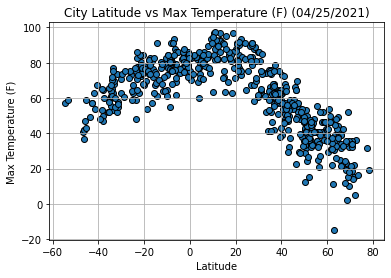

In [19]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (F) (04/25/2021)')
plt.scatter(city_data['lat'],city_data['temp'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/city_lat_vs_max_temp.png")

## Latitude vs. Humidity Plot

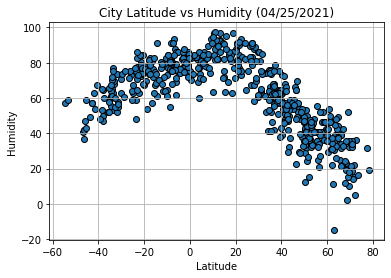

In [23]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity (04/25/2021)')
plt.scatter(city_data['lat'],city_data['temp'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/City_Lat_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

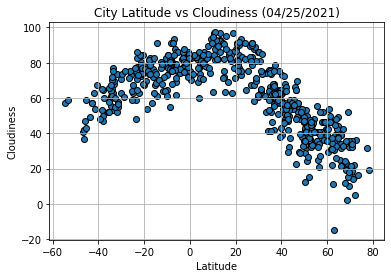

In [22]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness (04/25/2021)')
plt.scatter(city_data['lat'],city_data['temp'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/City_Lat_vs Cloudiness_.png")

## Latitude vs. Wind Speed Plot

In [ ]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed (04/25/2021)')
plt.scatter(city_data['lat'],city_data['temp'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/City_Lat_vs_Wind_Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression